In [2]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from matplotlib.cm import ScalarMappable 

In [9]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [4]:
def init_ds(json):

    ds= {}
    keys = json.keys()
    for k in keys:
        ds[k]= []
    return ds, keys

def read_json(file):
    dataset = {}
    keys = []
    with open(file) as file_lines:
        for count, line in enumerate(file_lines):
            data = json.loads(line.strip())
            if count ==0:
                dataset, keys = init_ds(data)
            for k in keys:
                dataset[k].append(data[k])
                
        return pd.DataFrame(dataset)

# EDA for Main Dataset

In [5]:
yelp_business = read_json('/Users/shivanibalaji/Downloads/yelp_dataset/yelp_academic_dataset_business.json')
yelp_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [79]:
print("The Average start reviews for restaurants is", np.round(yelp_business['stars'].mean(), 2))
print("The Average review count for restaurants is", np.round(yelp_business['review_count'].mean(), 2))
print("The most reviewed restaurant is", yelp_business.nlargest(1, ['review_count'])['name'].values[0])
print("The city with the most restaurants is", yelp_business.groupby('city').size().idxmax())
print("The state with the most restaurants is", yelp_business.groupby('state').size().idxmax())

The Average start reviews for restaurants is 3.54
The Average review count for restaurants is 36.94
The most reviewed restaurant is Bacchanal Buffet
The city with the most restaurants is Las Vegas
The state with the most restaurants is AZ


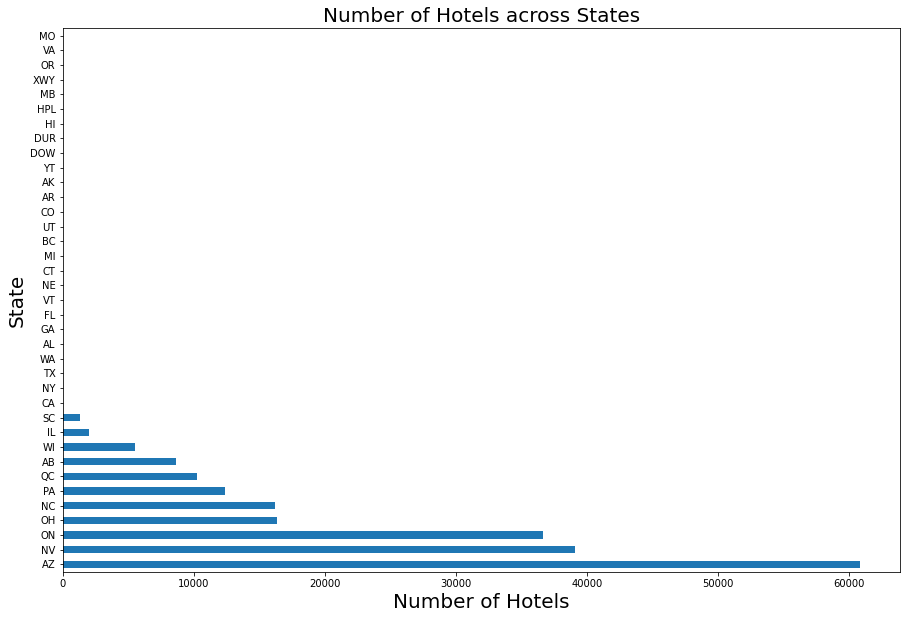

In [23]:
plt.figure(figsize=(15,10))
yelp_business.groupby('state').size().sort_values(ascending=False).plot.barh()
plt.title('Number of Hotels across States', fontsize=20)
plt.xlabel('Number of Hotels', fontsize = 20)
plt.ylabel('State', fontsize = 20)
plt.show()

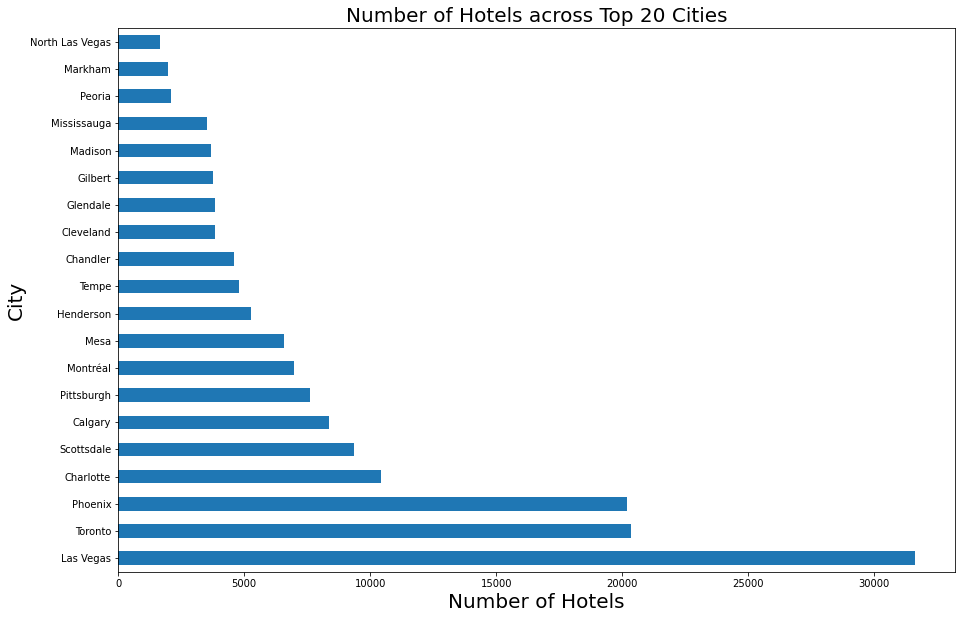

In [24]:
plt.figure(figsize=(15,10))
yelp_business.groupby('city').size().sort_values(ascending=False)[:20].plot.barh()
plt.title('Number of Hotels across Top 20 Cities', fontsize=20)
plt.xlabel('Number of Hotels', fontsize = 20)
plt.ylabel('City', fontsize = 20)
plt.show()

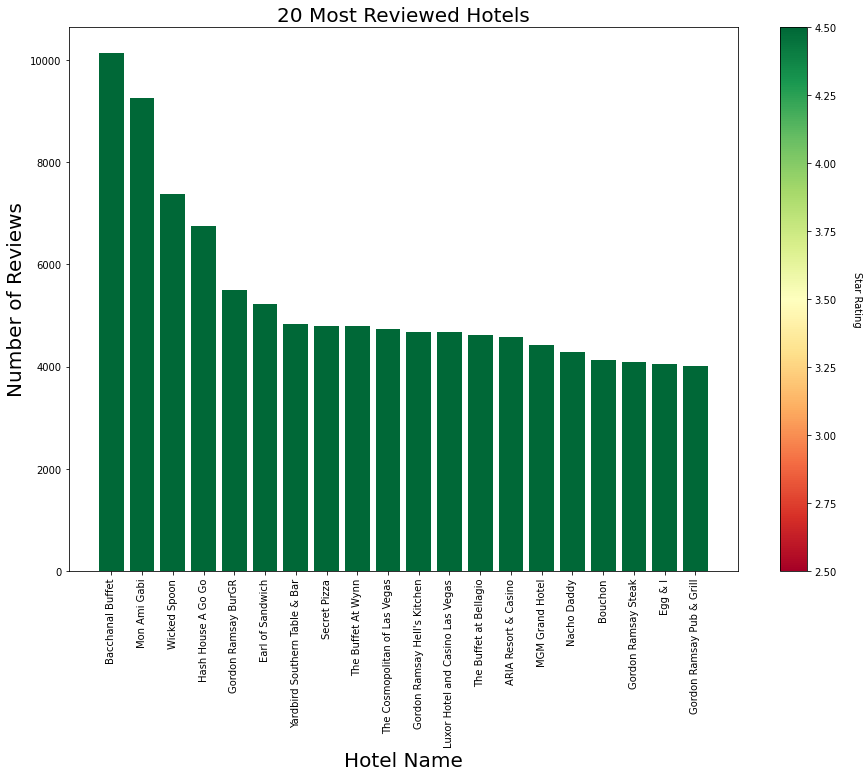

In [27]:
x = yelp_business.nlargest(20, ['review_count'])['name']
y = yelp_business.nlargest(20, ['review_count'])['review_count']
data_color = yelp_business.nlargest(20, ['review_count'])['stars']
my_cmap = plt.cm.get_cmap('RdYlGn')
colors = my_cmap(data_color)

plt.figure(figsize=(15,10))
plt.bar(x, y, color=colors)
plt.title('20 Most Reviewed Hotels', fontsize=20)
plt.xlabel('Hotel Name', fontsize = 20)
plt.ylabel('Number of Reviews', fontsize = 20)
plt.xticks(rotation=90)

normmin=min(yelp_business.nlargest(20, ['review_count'])['stars'])
normmax= max(yelp_business.nlargest(20, ['review_count'])['stars'])
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(normmin,normmax))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Star Rating', rotation=270,labelpad=25)

plt.show()


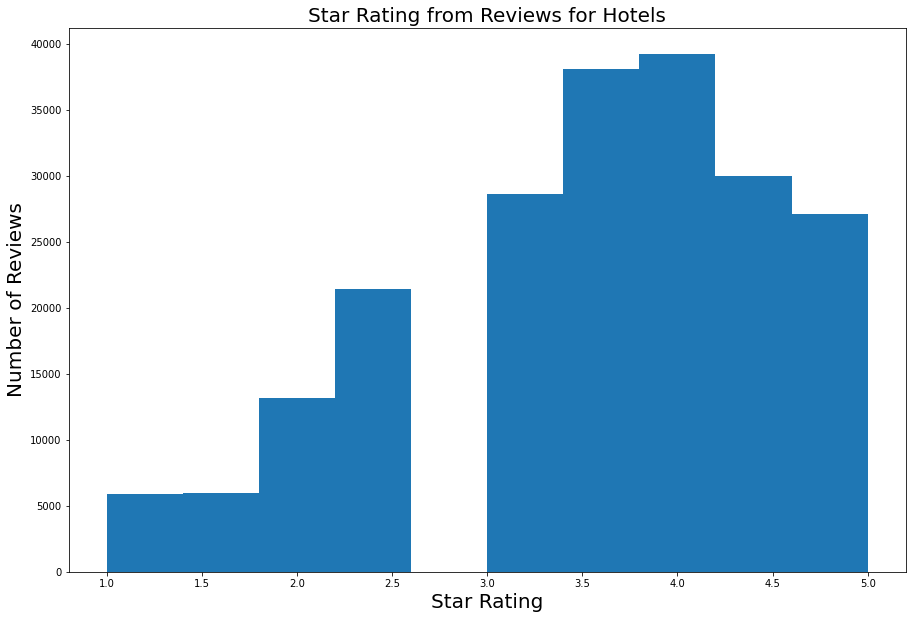

In [29]:
plt.figure(figsize=(15,10))
plt.hist(yelp_business['stars'])
plt.title('Star Rating from Reviews for Hotels', fontsize=20)
plt.xlabel('Star Rating', fontsize = 20)
plt.ylabel('Number of Reviews', fontsize = 20)
plt.show()

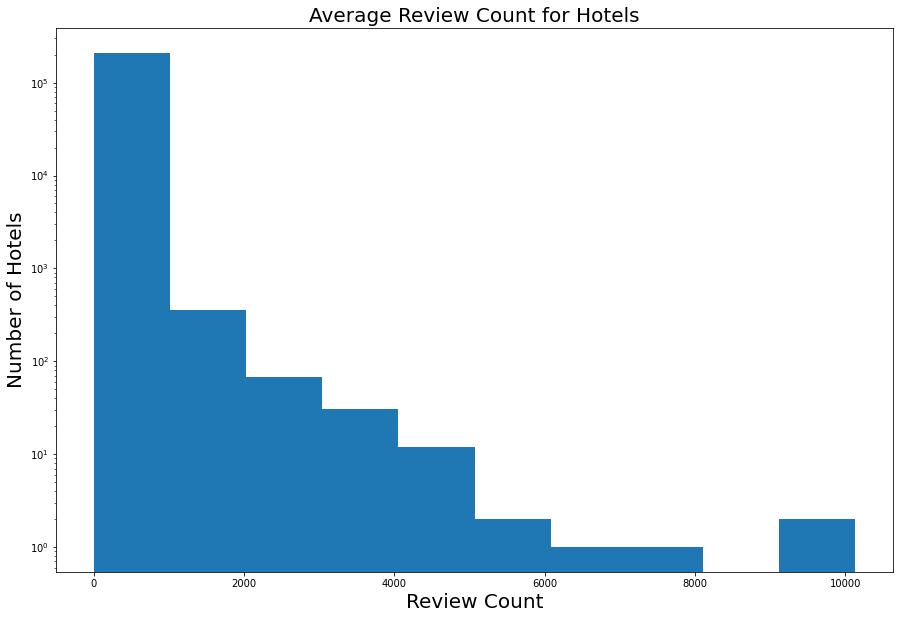

In [33]:
plt.figure(figsize=(15,10))
plt.hist(yelp_business['review_count'])
plt.title('Average Review Count for Hotels', fontsize=20)
plt.xlabel('Review Count', fontsize = 20)
plt.ylabel('Number of Hotels', fontsize = 20)
plt.yscale("log")
plt.show()

In [16]:
yelp_checkin = read_json('/Users/shivanibalaji/Downloads/yelp_dataset/yelp_academic_dataset_checkin.json')
yelp_checkin.head()

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


In [17]:
yelp_review = read_json('/Users/shivanibalaji/Downloads/yelp_dataset/yelp_academic_dataset_review.json')
yelp_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [18]:
yelp_tip = read_json('/Users/shivanibalaji/Downloads/yelp_dataset/yelp_academic_dataset_tip.json')
yelp_tip.head()

,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0


In [19]:
yelp_user = read_json('/Users/shivanibalaji/Downloads/yelp_dataset/yelp_academic_dataset_user.json')
yelp_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,...,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,...,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,...,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,...,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,...,9,2,1,1,22,28,31,31,19,31


In [51]:
yelp_business.groupby('city').size().sort_values(ascending=False)[:10]

city
Las Vegas     31631
Toronto       20366
Phoenix       20171
Charlotte     10422
Scottsdale     9342
Calgary        8377
Pittsburgh     7630
Montréal       6979
Mesa           6577
Henderson      5272
dtype: int64

In [6]:
yelp_business.shape

(209393, 14)

In [52]:
yelp_business.groupby('state').size().sort_values(ascending=False)[:10]

state
AZ    60803
NV    39084
ON    36627
OH    16392
NC    16218
PA    12376
QC    10233
AB     8682
WI     5525
IL     2034
dtype: int64

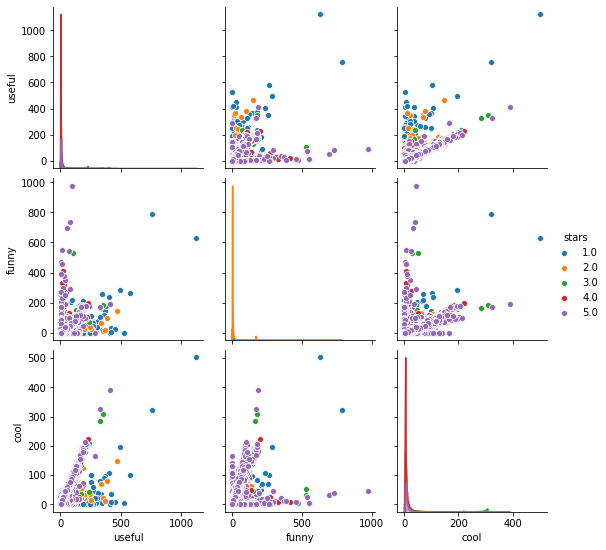

In [56]:
sns.pairplot(data=yelp_review,hue="stars")
plt.show()

# EDA New Dataset

In [3]:
first_model_df = pd.read_csv('/Users/shivanibalaji/Downloads/review_and_business_data_cleaned_withdate.csv')
first_model_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,hours,review_id,user_id,review_stars,useful,funny,cool,text,date,reviewlen
0,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118.0,36.063977,-115.241463,3.5,81.0,...,"{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...",9bMxu3-RCv0ncYnNNNkbWg,IMguz1Z9dp8HG0UfeLEdEg,5.0,3.0,0.0,1.0,I've been coming to this dry cleaner for almos...,2016-06-23 05:50:54,361.0
1,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118.0,36.063977,-115.241463,3.5,81.0,...,"{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...",b-B3ycJZmOTP5EdWTwCsMA,_TAVpa1Y2_5KZ5wWYeX_6g,1.0,1.0,0.0,0.0,They lost 2 pairs of my suitpants and told me ...,2011-10-27 23:35:10,282.0
2,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118.0,36.063977,-115.241463,3.5,81.0,...,"{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...",MaIIb4Er_LuqN3zSSdA06w,45R6BBybzwDuJaL08d1myQ,5.0,1.0,0.0,0.0,I have been going to this dry cleaning since I...,2013-07-13 03:25:04,543.0
3,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118.0,36.063977,-115.241463,3.5,81.0,...,"{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...",N8z7ppoHET-6m7O60Hau1g,lYvUtZWr1gGv4vlwNcJXDQ,1.0,2.0,0.0,0.0,The staff is very nice and friendly. However ...,2016-05-07 16:01:55,777.0
4,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118.0,36.063977,-115.241463,3.5,81.0,...,"{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...",jLVbrB6JJFpnrb-_6YwGOQ,b0eCjnqua4C3f0OLDhZHxA,1.0,1.0,1.0,0.0,DO NOT GO HERE. They are great until there i...,2013-01-28 10:40:43,859.0


# Category Preprocessing

In [4]:
first_model_df["categories"] = first_model_df['categories'].astype(str)

In [5]:
category_string = []
dict_cat = {}
for i in range(len(first_model_df["categories"].values)):
        for j in range(len(first_model_df["categories"].values[i].split(","))):
            
            if first_model_df["categories"].values[i].split(",")[j] not in dict_cat:
                dict_cat[first_model_df["categories"].values[i].split(",")[j]] = 1
            else:
                dict_cat[first_model_df["categories"].values[i].split(",")[j]] += 1

In [6]:
sorted(dict_cat.items(), key=lambda x: x[1])[-100:]

[(' Massage', 6975),
 (' Fitness & Instruction', 7241),
 ('Italian', 7291),
 ('Pizza', 7302),
 (' Diners', 7317),
 (' Chicken Wings', 7405),
 (' Ice Cream & Frozen Yogurt', 7413),
 ('Automotive', 7549),
 (' Thai', 7623),
 (' Mediterranean', 7630),
 ('Breakfast & Brunch', 7900),
 (' French', 7949),
 ('Japanese', 8070),
 (' Korean', 8183),
 ('Active Life', 8185),
 ('Mexican', 8288),
 (' Pubs', 8398),
 ('Sandwiches', 8442),
 ('Seafood', 8455),
 (' Home & Garden', 9052),
 ('Home Services', 9212),
 ('American (Traditional)', 9315),
 ('Hotels & Travel', 9328),
 (' Real Estate', 9386),
 ('Health & Medical', 9541),
 (' Soup', 9640),
 (' Wine Bars', 9783),
 (' Vegetarian', 9919),
 (' Waxing', 10161),
 (' Nail Salons', 10371),
 (' Auto Repair', 11015),
 (' Juice Bars & Smoothies', 11044),
 ('Bars', 11088),
 (' Local Flavor', 11186),
 (' Music Venues', 11363),
 (' Caterers', 11489),
 (' Professional Services', 11762),
 (' Skin Care', 11773),
 (' Sports Bars', 11966),
 (' Venues & Event Spaces', 1

In [7]:
first_model_df.shape

(679950, 23)

In [10]:
first_model_df[first_model_df['categories'].str.contains("Italian|Pizza|Diners|Chicken|Yogurt|Thai|Mediterranean|Breakfast|Brunch|French|Japanese|Korean|Mexican|Pubs|Sandwich|Seafood|Soup|Wine|Bars|Vegetarian|Juice|Flavor|Baker|Beer|Vegan|Barbeque|Cafe|Food|Buffet|Chinese|Sushi|Salad|Pizza|Italian|Coffee|Tea|Steak|Dessert|Burger|Sandwich|Restaurant", flags=re.IGNORECASE, regex=True)].shape

(421003, 23)

In [11]:
# Assigning the new dataframe as the main DF
yelp_data = first_model_df[first_model_df['categories'].str.contains("Italian|Pizza|Diners|Chicken|Yogurt|Thai|Mediterranean|Breakfast|Brunch|French|Japanese|Korean|Mexican|Pubs|Sandwich|Seafood|Soup|Wine|Bars|Vegetarian|Juice|Flavor|Baker|Beer|Vegan|Barbeque|Cafe|Food|Buffet|Chinese|Sushi|Salad|Pizza|Italian|Coffee|Tea|Steak|Dessert|Burger|Sandwich|Restaurant", flags=re.IGNORECASE, regex=True)]

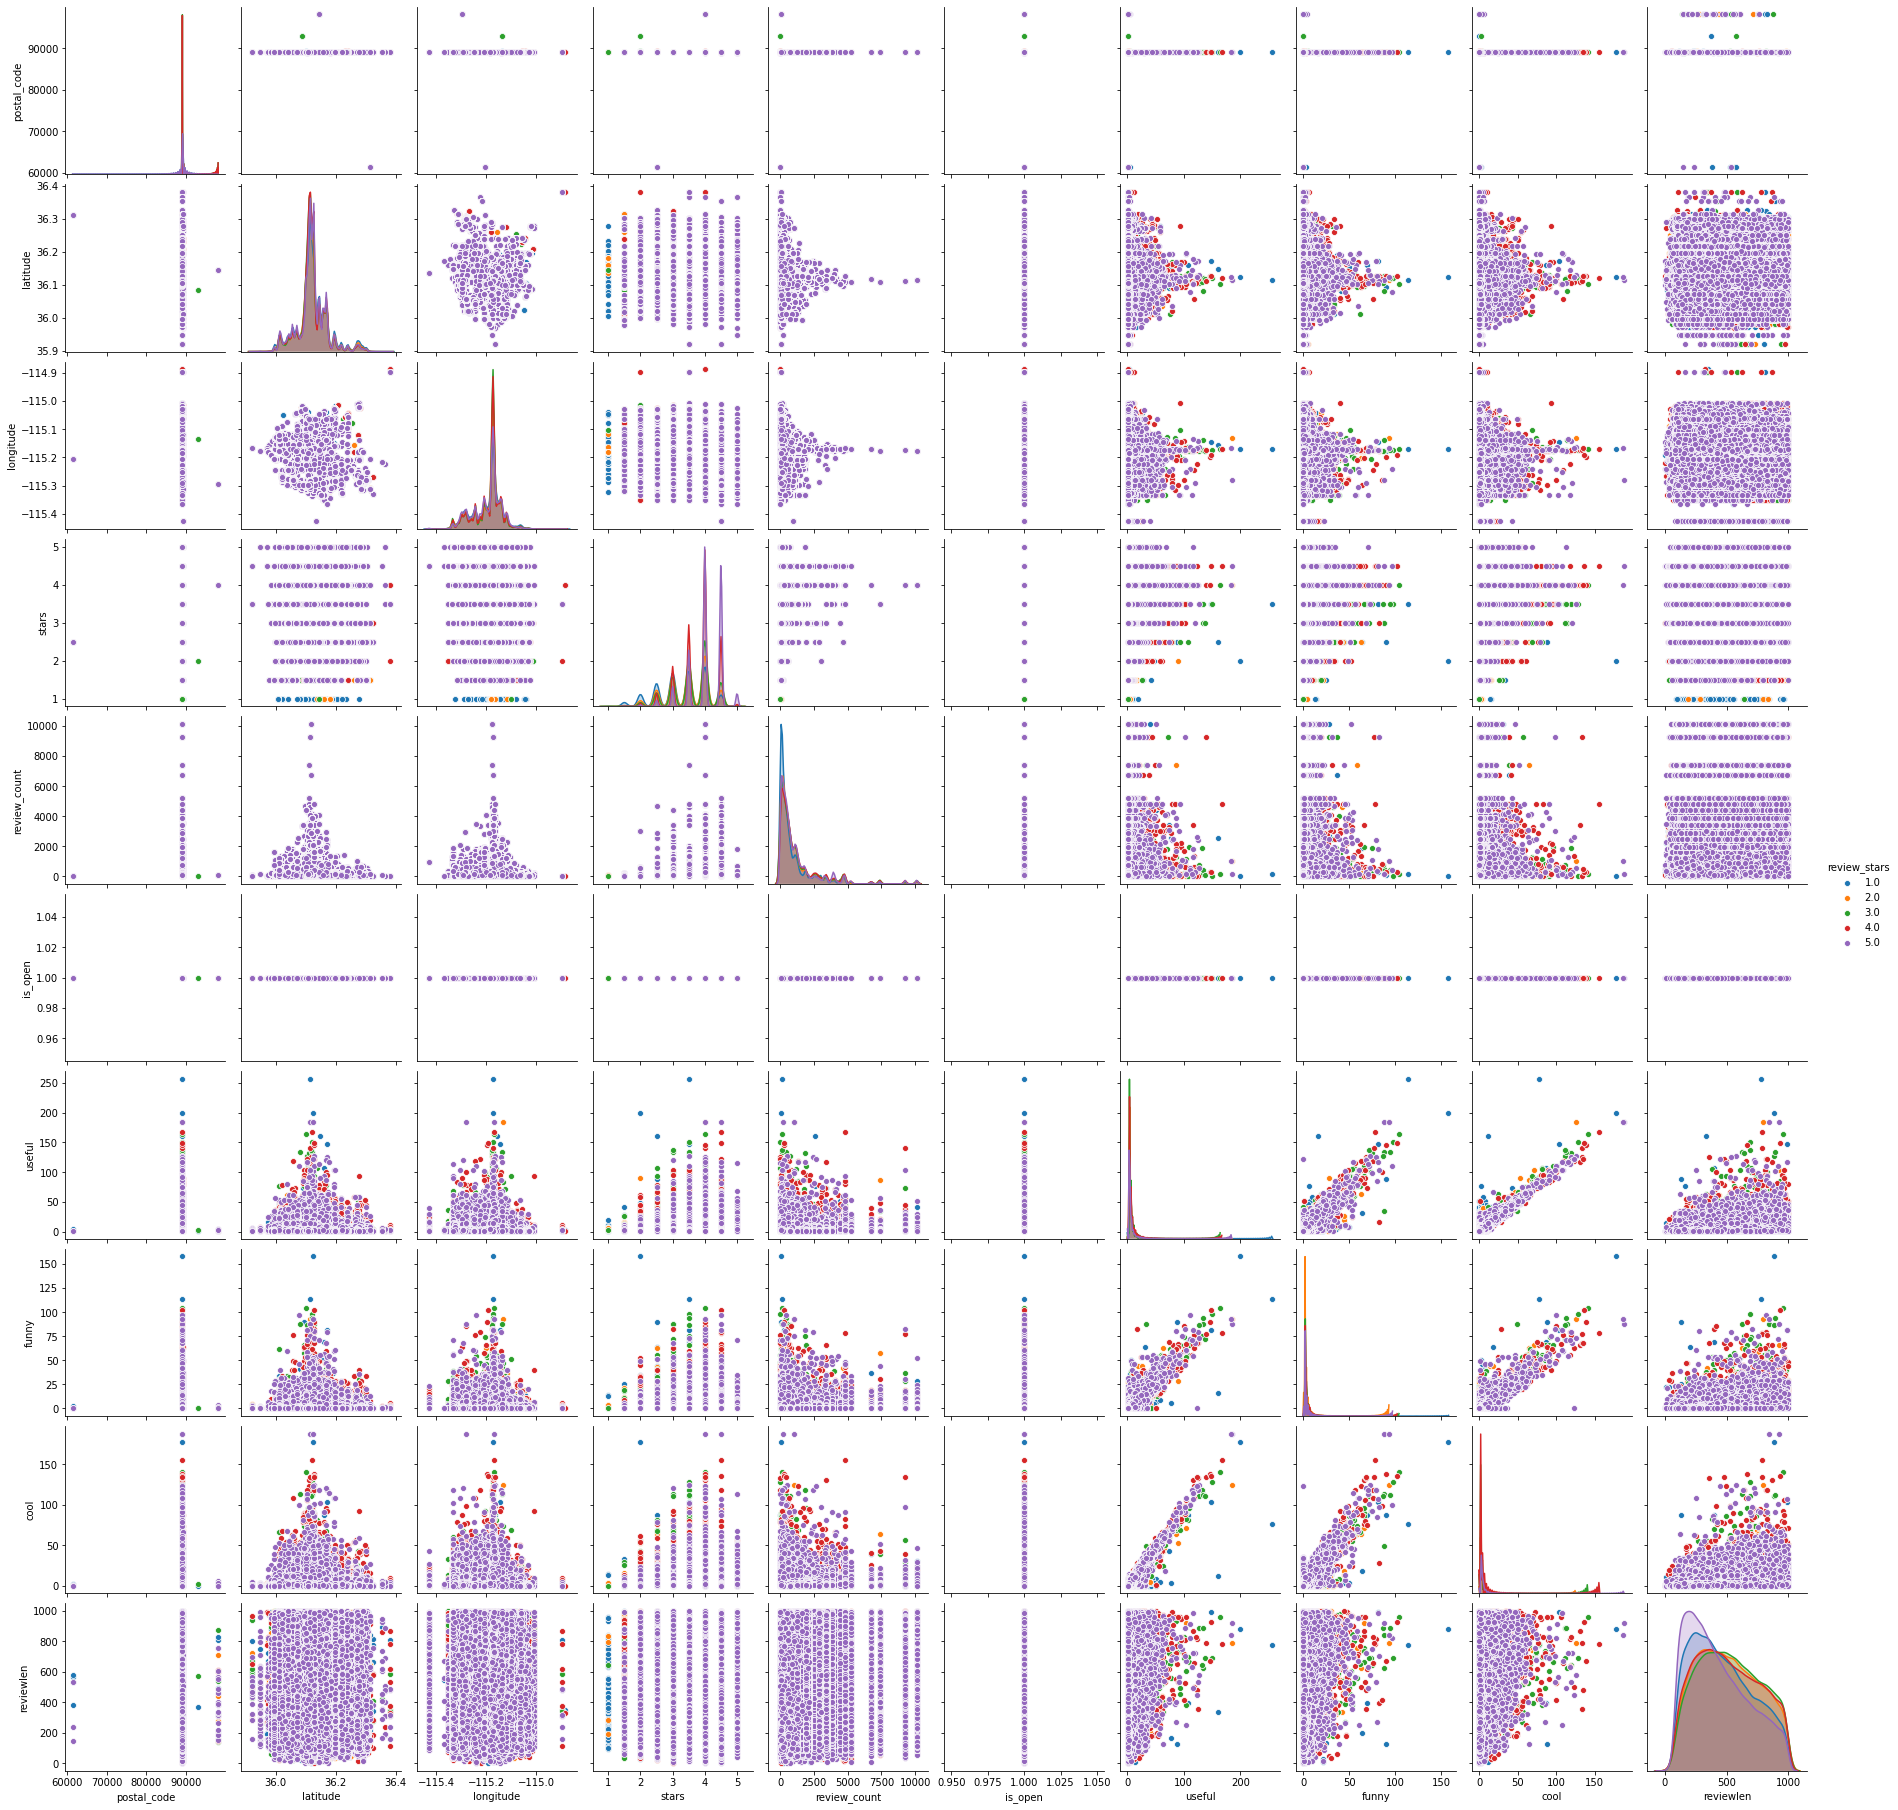

In [12]:
sns.pairplot(data=yelp_data,hue="review_stars")
plt.show()

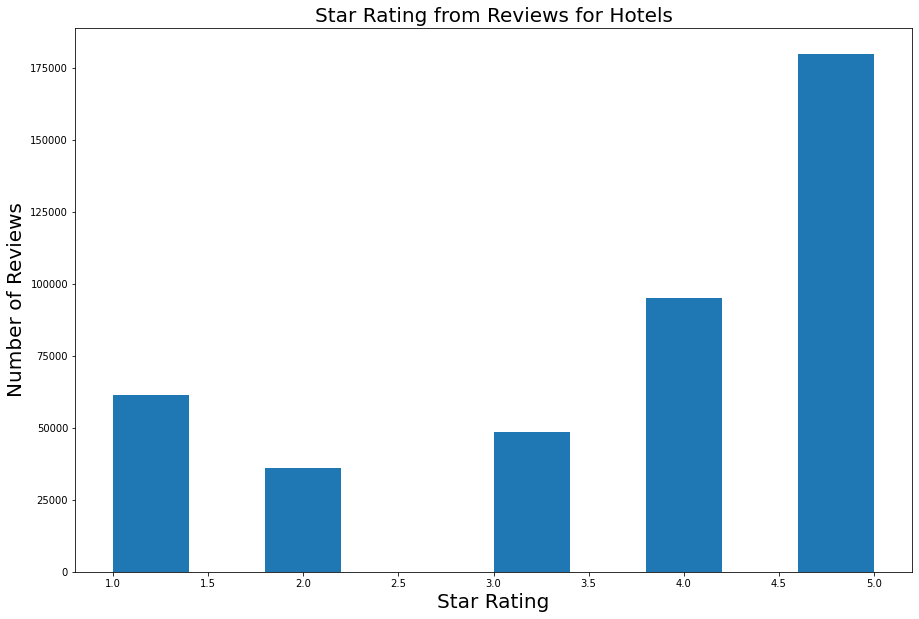

In [13]:
plt.figure(figsize=(15,10))
plt.hist(yelp_data['review_stars'])
plt.title('Star Rating from Reviews for Hotels', fontsize=20)
plt.xlabel('Star Rating', fontsize = 20)
plt.ylabel('Number of Reviews', fontsize = 20)
plt.show()

In [14]:
yelp_subset = yelp_data.drop_duplicates(subset='name', keep="first")
yelp_subset.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,hours,review_id,user_id,review_stars,useful,funny,cool,text,date,reviewlen
58,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,NaN,Las Vegas,NV,89109.0,36.128561,-115.171130,4.5,11.0,...,{'Friday': '18:0-0:0'},3YqK4FWeq2hPRFIIuDkv4w,-xDW3gYiYaoeVASXywTPgw,5.0,20.0,8.0,19.0,For real.\nThis place has INCREDIBLE pizza! \n...,2018-03-29 00:13:11,679.0
60,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131.0,36.307495,-115.279059,2.5,37.0,...,NaN,J3JlYjXed3THOUJ7ULBCoQ,OE5MNd5PVORXxcrHEoWPdA,1.0,1.0,1.0,1.0,Do not stop here if you are wanting fast food....,2016-07-04 21:04:10,360.0
71,mRMljeCr44acwg7KgS1UUg,Bonanza Indoor Swapmeet,1720 E Charleston Blvd,Las Vegas,NV,89104.0,36.157729,-115.126477,2.5,7.0,...,"{'Monday': '10:0-19:0', 'Wednesday': '10:0-19:...",C6W2imECpZnhbc2XMolglw,ztPmVNT8DE-CIeNg1fM2BQ,1.0,2.0,5.0,1.0,This is got to be the worst swap meet on the f...,2015-06-29 18:33:36,239.0
77,upSPwM6Fr6RHAhwagnleow,Manantial De Salud,4254 E Charleston Blvd,Las Vegas,NV,89104.0,36.159221,-115.082607,5.0,3.0,...,"{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:30',...",Wj2scpb-B5i58fZbyzpE5A,UER4m0CBVgcFlVbMqhCvCg,5.0,18.0,8.0,12.0,I normally don't bother with dealing health st...,2012-03-30 00:46:54,706.0
80,Yr_w9lakJrKMyEG_hI6zbA,Fat Moe's Pizza & Wings,"6125 W Tropicana Ave, Ste F",Las Vegas,NV,89103.0,36.099361,-115.226636,4.0,141.0,...,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",79q27XHCJFGQ-XmDl5cCFw,6LIYm-2ky22qf-JGDR19bQ,5.0,1.0,0.0,0.0,I love this restaurant! I eat here a few times...,2016-10-03 01:28:07,288.0


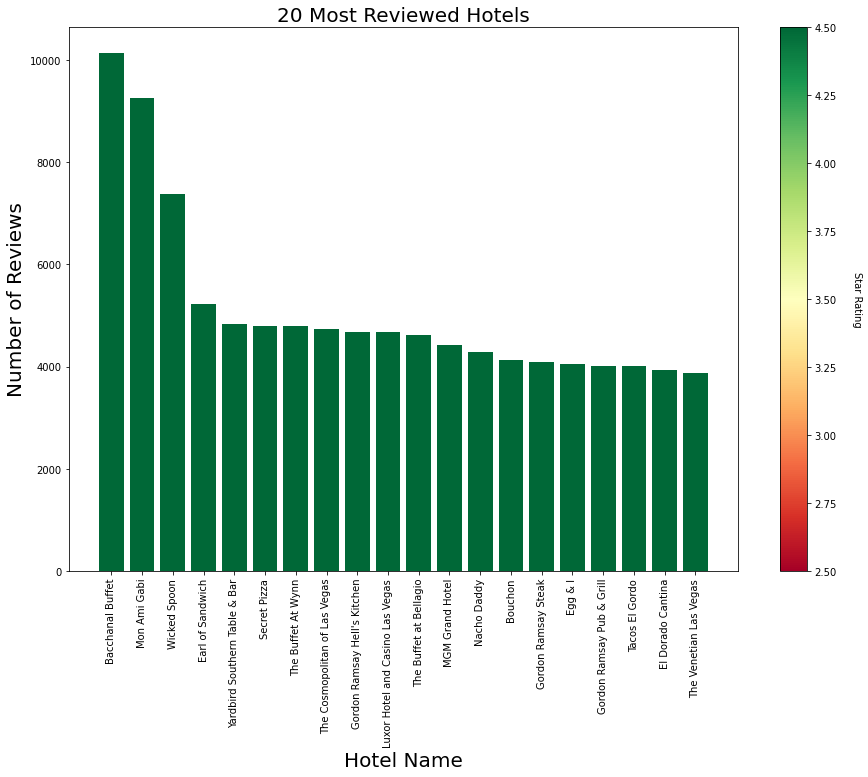

In [15]:
#most reviewed hotels
x = yelp_subset.nlargest(20, ['review_count'])['name']
y = yelp_subset.nlargest(20, ['review_count'])['review_count']
data_color = yelp_subset.nlargest(20, ['review_count'])['stars']
my_cmap = plt.cm.get_cmap('RdYlGn')
colors = my_cmap(data_color)

plt.figure(figsize=(15,10))
plt.bar(x, y, color=colors)
plt.title('20 Most Reviewed Hotels', fontsize=20)
plt.xlabel('Hotel Name', fontsize = 20)
plt.ylabel('Number of Reviews', fontsize = 20)
plt.xticks(rotation=90)

normmin=min(yelp_subset.nlargest(20, ['review_count'])['stars'])
normmax= max(yelp_subset.nlargest(20, ['review_count'])['stars'])
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(normmin,normmax))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Star Rating', rotation=270,labelpad=25)

plt.show()


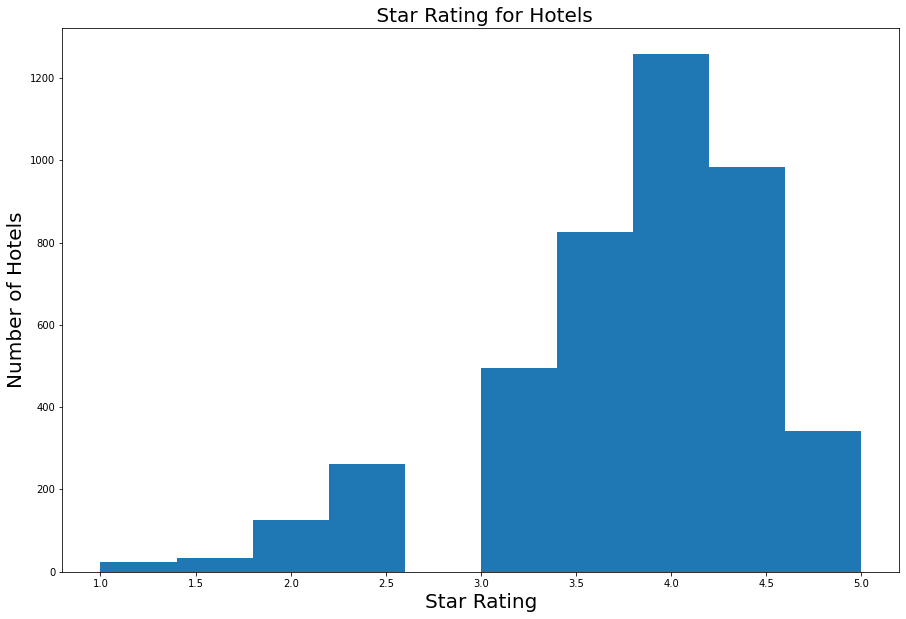

In [16]:
plt.figure(figsize=(15,10))
plt.hist(yelp_subset['stars'])
plt.title(' Star Rating for Hotels', fontsize=20)
plt.xlabel('Star Rating', fontsize = 20)
plt.ylabel('Number of Hotels', fontsize = 20)
plt.show()

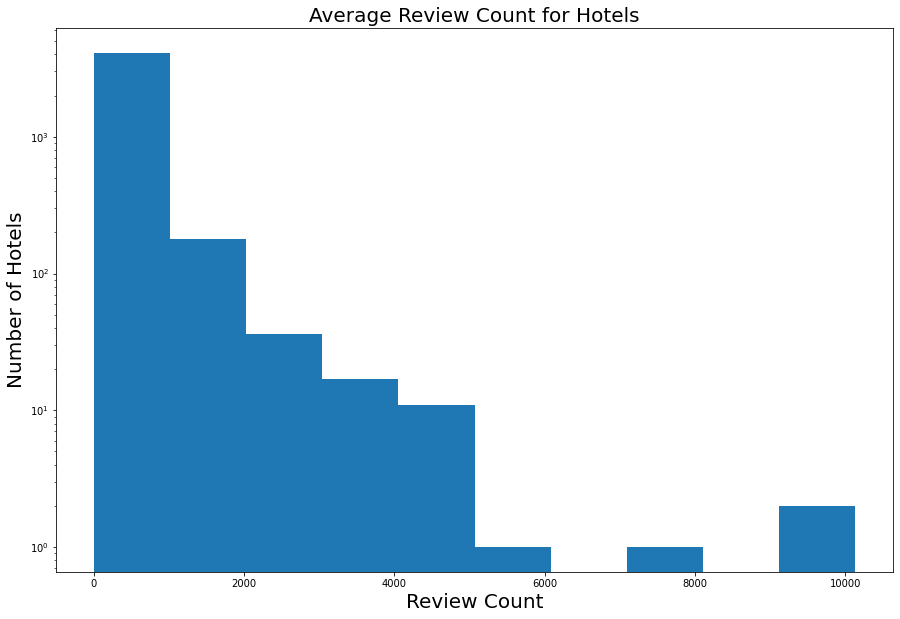

In [17]:
plt.figure(figsize=(15,10))
plt.hist(yelp_subset['review_count'])
plt.title('Average Review Count for Hotels', fontsize=20)
plt.xlabel('Review Count', fontsize = 20)
plt.ylabel('Number of Hotels', fontsize = 20)
plt.yscale("log")
plt.show()

In [19]:
yelp_subset_postal = yelp_subset[yelp_subset.postal_code.isnull()==False]
yelp_subset_postal.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code     float64
latitude        float64
longitude       float64
stars           float64
review_count    float64
is_open         float64
attributes       object
categories       object
hours            object
review_id        object
user_id          object
review_stars    float64
useful          float64
funny           float64
cool            float64
text             object
date             object
reviewlen       float64
dtype: object

In [20]:
yelp_subset_postal.postal_code = yelp_subset_postal.postal_code.astype(int)
yelp_subset_postal.postal_code = yelp_subset_postal.postal_code.astype(str)

yelp_subset_postal.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count    float64
is_open         float64
attributes       object
categories       object
hours            object
review_id        object
user_id          object
review_stars    float64
useful          float64
funny           float64
cool            float64
text             object
date             object
reviewlen       float64
dtype: object

In [21]:
zipcodes_agg = pd.DataFrame(yelp_subset_postal.groupby('postal_code').size().sort_values(ascending=False), columns = ['count'])
zipcodes_agg.reset_index(level=0, inplace=True)
zipcodes_agg.head()

,postal_code,count
0,89109,827
1,89119,337
2,89101,277
3,89102,259
4,89103,240


In [22]:
#load GeoJSON
import json
with open ('/Users/shivanibalaji/Downloads/nv_nevada_zip_codes_geo.min.json', 'r') as jsonFile:
    data = json.load(jsonFile)
tmp = data

# remove zipcodes not in dataset 
geozips = []

for i in range(len(tmp['features'])):
    if tmp['features'][i]['properties']['ZCTA5CE10'] in list(yelp_subset_postal['postal_code']):
        geozips.append(tmp['features'][i])
        
new_json = dict.fromkeys(['type', 'features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips


open ("updated-file.json", "w").write(
    json.dumps(new_json, sort_keys = True, indent = 4, separators = (',', ': ')))

5186552

In [23]:
import folium
from folium.plugins import MarkerCluster # for clustering the markers

map = folium.Map(location=[36.1699, -115.1398], default_zoom_start=15)

map.choropleth(geo_data = new_json,
             data=zipcodes_agg, # my dataset
             columns=['postal_code', 'count'], # zip code is here for matching the geojson zipcode, sales price is the column that changes the color of zipcode areas
             key_on='feature.properties.ZCTA5CE10', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='BuPu', fill_opacity=0.8, line_opacity=0.2,
             legend_name='Number of Restaurants')

folium.LayerControl().add_to(map)
map